**Step 1 : Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np

df_af = pd.read_csv('afclean.csv')
df_n = pd.read_csv('nclean.csv')
df_pvc = pd.read_csv('pvcclean.csv')

In [ ]:
#Kita cek data AF dulu
df_af

,Unnamed: 0,Time,PLETH,II
0,0,00:24:47.500,-171,-27.66
1,1,00:24:47.500,-160,-72.84
2,2,00:24:47.500,-149,-30.01
3,3,00:24:47.500,-138,-19.12
4,4,00:24:47.600,-130,-5.88
...,...,...,...,...
1895,1895,00:37:47.800,-91,5.86
1896,1896,00:37:47.800,-93,6.08
1897,1897,00:37:47.800,-95,11.60
1898,1898,00:37:47.800,-96,9.66


In [ ]:
#Hapus kolom yang tidak perlu
df_af.drop(['Unnamed: 0','Time','II'], axis=1, inplace=True)
df_af.head(1)

,PLETH
0,-171


In [ ]:
#Uji data hilang
df_af['PLETH'].replace('', np.nan, inplace=True)
df_af.dropna(subset=['PLETH'], inplace=True)
df_af.head(1)

,PLETH
0,-171


In [ ]:
#Kita cek data Netral dulu
df_n

,Unnamed: 0,Time,PLETH,II
0,0,20:56:11.380,-80,0.44
1,1,20:56:11.380,-72,1.37
2,2,20:56:11.380,-64,2.06
3,3,20:56:11.427,-55,3.03
4,4,20:56:11.427,-47,4.31
...,...,...,...,...
1895,1895,20:56:49.210,-90,9.97
1896,1896,20:56:49.210,-87,8.18
1897,1897,20:56:49.244,-81,6.60
1898,1898,20:56:49.293,-75,4.83


In [ ]:
#Hapus kolom yang tidak perlu
df_n.drop(['Unnamed: 0','Time','II'], axis=1, inplace=True)
df_n.head(1)

,PLETH
0,-80


In [ ]:
#Uji data hilang
df_n['PLETH'].replace('', np.nan, inplace=True)
df_n.dropna(subset=['PLETH'], inplace=True)
df_n.head(1)

,PLETH
0,-80


In [ ]:
#Kita cek data PVC dulu
df_pvc

,Unnamed: 0,Time,II,PLETH
0,0,08:22:15.92,0.003,0.866
1,1,08:22:15.922,0.003,0.866
2,2,08:22:15.924,0.003,0.866
3,3,08:22:15.926,0.034,0.866
4,4,08:22:15.928,0.034,0.842
...,...,...,...,...
5995,5995,09:48:32.214,-0.352,0.673
5996,5996,09:48:32.216,-0.352,0.661
5997,5997,09:48:32.218,-0.352,0.661
5998,5998,09:48:32.22,-0.317,0.661


In [ ]:
#Hapus kolom yang tidak perlu
df_pvc.drop(['Unnamed: 0','Time','II'], axis=1, inplace=True)
df_pvc.head(1)

,PLETH
0,0.866


In [ ]:
#Uji data hilang
df_pvc['PLETH'].replace('', np.nan, inplace=True)
df_pvc.dropna(subset=['PLETH'], inplace=True)
df_pvc.head(1)

,PLETH
0,0.866


**Step 2 : R-R Interval**

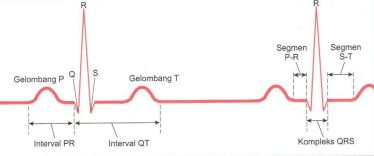

Sumber : https://skillslab.fk.uns.ac.id/wp-content/uploads/2019/02/smt-4-Interpretasi-EKG.pdf

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from statistics import stdev
import scipy.signal

In [ ]:
#Cari R-R Interval AF
sample_ppg_af = df_af['PLETH'][0:100]
stdev_sample_ppg_af = stdev(sample_ppg_af)
peaks_sample_ppg_af,_ = scipy.signal.find_peaks(sample_ppg_af, distance=31)
peaks_sample_ppg_af

array([38, 76])

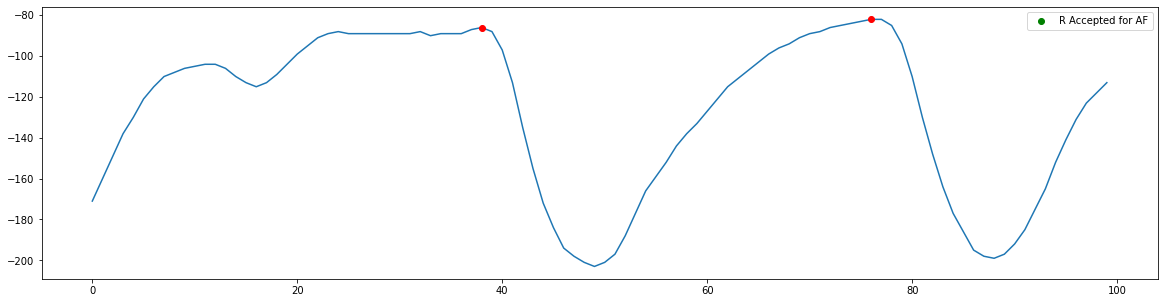

In [ ]:
peaksnidx_sample_ppg_af = sample_ppg_af[[peaks_sample_ppg_af[0], peaks_sample_ppg_af[1]]]
peakslabel_af = mlines.Line2D([], [], color='green', linestyle=' ', marker='o', label='R Accepted for AF')
plt.figure(figsize=(20, 5))
plt.legend(handles=[peakslabel_af])
plt.plot(sample_ppg_af)
plt.plot(peaksnidx_sample_ppg_af, 'o', color='red')

In [ ]:
#Cari R-R Interval Normal
sample_ppg_n = df_n['PLETH'][0:100]
stdev_sample_ppg_n = stdev(sample_ppg_n)
peaks_sample_ppg_n,_ = scipy.signal.find_peaks(sample_ppg_n, distance=31)
peaks_sample_ppg_n

array([19, 66])

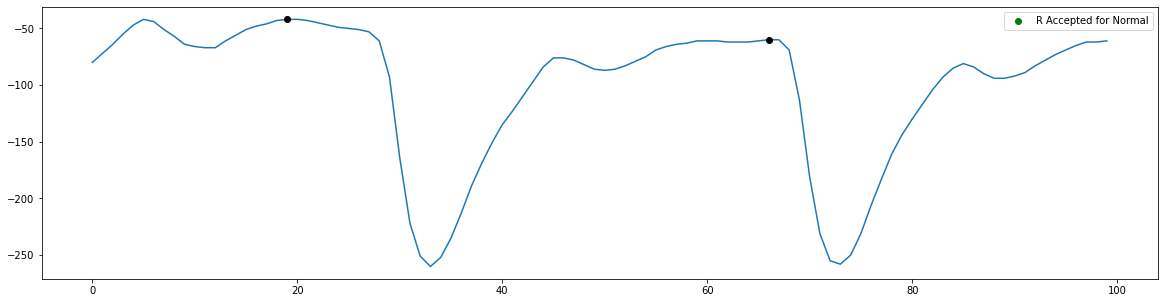

In [ ]:
peaksnidx_sample_ppg_n = sample_ppg_n[[peaks_sample_ppg_n[0], peaks_sample_ppg_n[1]]]
peakslabel_n = mlines.Line2D([], [], color='green', linestyle=' ', marker='o', label='R Accepted for Normal')
plt.figure(figsize=(20, 5))
plt.legend(handles=[peakslabel_n])
plt.plot(sample_ppg_n)
plt.plot(peaksnidx_sample_ppg_n, 'o', color='black')

In [ ]:
#Cari R-R Interval PVC
sample_ppg_pvc = df_pvc['PLETH'][0:600]
stdev_sample_ppg_pvc = stdev(sample_ppg_pvc)
peaks_sample_ppg_pvc,_ = scipy.signal.find_peaks(sample_ppg_pvc, distance=100)
peaks_sample_ppg_pvc

array([277, 516])

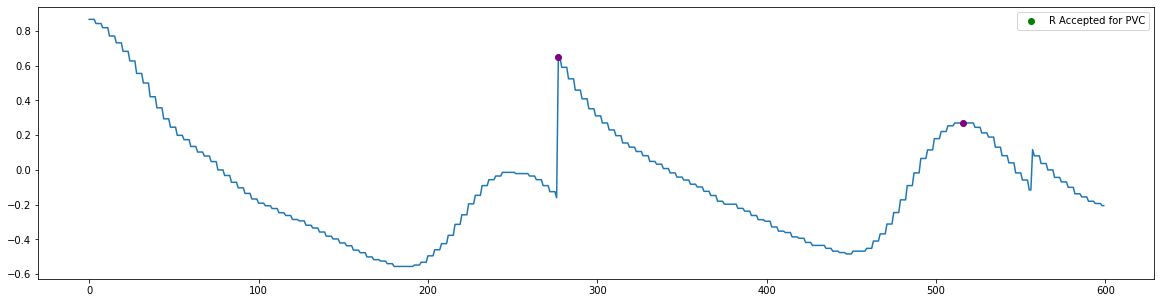

In [ ]:
peaksnidx_sample_ppg_pvc = sample_ppg_pvc[[peaks_sample_ppg_pvc[0], peaks_sample_ppg_pvc[1]]]
peakslabel_pvc = mlines.Line2D([], [], color='green', linestyle=' ', marker='o', label='R Accepted for PVC')
plt.figure(figsize=(20, 5))
plt.legend(handles=[peakslabel_pvc])
plt.plot(sample_ppg_pvc)
plt.plot(peaksnidx_sample_ppg_pvc, 'o', color='purple')

**Feature Extraction with DWT**

In [ ]:
import pywt as dwt
import statistics
import Createdataset as c
import soft
import bwr
from sklearn.decomposition import PCA
import scipy.signal

In [ ]:
peaks_af,_ = scipy.signal.find_peaks(df_af['PLETH'], distance=30)
peaks_af

array([  38,   76,  129,  161,  210,  246,  280,  315,  355,  389,  445,
        505,  538,  583,  622,  660,  698,  729,  790,  845,  905,  938,
       1001, 1051, 1089, 1134, 1181, 1226, 1259, 1310, 1341, 1379, 1418,
       1464, 1515, 1584, 1629, 1659, 1716, 1778, 1821, 1888])

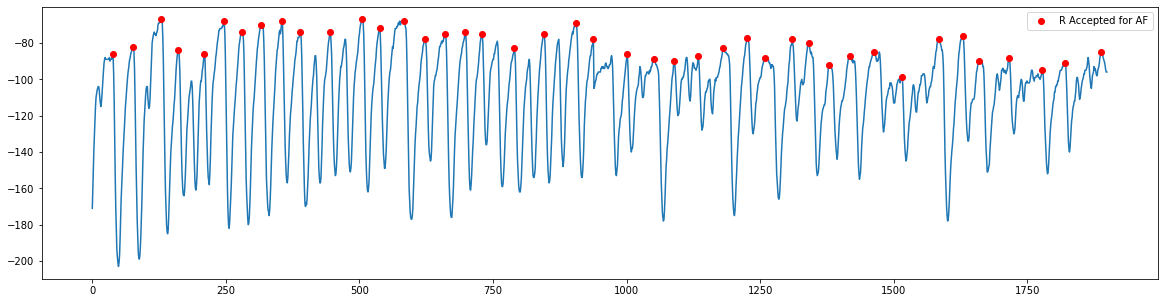

In [ ]:
peaksnidx_af = df_af['PLETH'][peaks_af]
peakslabel_af = mlines.Line2D([], [], color='red', linestyle=' ', marker='o', label='R Accepted for AF')
plt.figure(figsize=(20, 5))
plt.legend(handles=[peakslabel_af])
plt.plot(df_af['PLETH'])
plt.plot(peaksnidx_af, 'o', color='red')

In [ ]:
data_af = []
for i in range(0,19):
  row_af=[]
  for j in range(0,100):
    data = df_af['PLETH'][(i*100)+j]
    row_af.append(data)
  data_af.append(row_af)

print(data_af)

[[-171, -160, -149, -138, -130, -121, -115, -110, -108, -106, -105, -104, -104, -106, -110, -113, -115, -113, -109, -104, -99, -95, -91, -89, -88, -89, -89, -89, -89, -89, -89, -89, -88, -90, -89, -89, -89, -87, -86, -88, -97, -113, -135, -155, -172, -184, -194, -198, -201, -203, -201, -197, -188, -177, -166, -159, -152, -144, -138, -133, -127, -121, -115, -111, -107, -103, -99, -96, -94, -91, -89, -88, -86, -85, -84, -83, -82, -82, -85, -94, -110, -130, -148, -164, -177, -186, -195, -198, -199, -197, -192, -185, -175, -165, -152, -141, -131, -123, -118, -113], [-108, -105, -104, -104, -110, -114, -116, -115, -111, -103, -94, -86, -80, -78, -76, -75, -74, -75, -75, -76, -75, -74, -73, -70, -69, -69, -69, -68, -68, -67, -67, -69, -77, -90, -110, -130, -147, -162, -172, -180, -184, -185, -183, -176, -166, -157, -148, -140, -135, -130, -126, -123, -119, -114, -111, -105, -100, -94, -90, -87, -85, -84, -84, -89, -97, -112, -128, -141, -152, -159, -163, -164, -164, -160, -154, -146, -136, -

In [ ]:
data_sample_af = []
baseline_af = []
ppg_out_af = []
for i in range(0,19):
  if i!=3 and i!=6 and i!=8 and i!=10 and i!=11 and i!=14 and i!=15 and i!=18:
    sinyal = soft.waveletSmooth(data_af[i])
    (baseline, ppg_out) = bwr.bwr(sinyal)
    len_sample = len(data_af[i])

    sampled_window = len_sample
    sample = []
    for j in range(sampled_window):
        sample.append(ppg_out[j - 1])
    data_sample_af.append(sample)
    baseline_af.append(baseline)
    ppg_out_af.append(ppg_out)

print(data_sample_af)

[[-28.009632841768706, -66.42245328883557, -57.82761703419828, -45.84849630825863, -35.30712125413703, -29.33020535256219, -20.93552968345864, -15.104135184055323, -10.083539857101414, -6.731624163099156, -4.290675388111055, -3.121240287360635, -2.8973013583431424, -3.572524151392571, -5.33322787516515, -8.37031898419606, -9.889704702376648, -9.71155687031262, -8.616156446484894, -4.940391304022327, -1.616152076772849, 1.6178770810787597, 5.48760081823751, 9.149933760108908, 11.845664692395346, 13.282898502782913, 12.864912256213003, 10.903519533104713, 10.284883597465978, 11.134451873890114, 10.71169359995126, 10.649860711275053, 9.26560294252809, 6.362162584128043, 6.549391499711035, 6.636595314790682, 7.334740031871462, 8.8280109332063, 10.882886179402462, 13.488959489699411, 10.430753949361716, 1.0567642244245548, -13.850508447080614, -35.535846297821394, -53.749275787262604, -68.12450447883899, -81.32352511595282, -89.57196090849587, -96.47354894902031, -101.1684338069484, -100.14

In [ ]:
r_peaks_af = []
list_upper_af = []
for h in range(0,len(data_sample_af)):
  m = np.max(data_sample_af[h])
  R = 0.2 * m
  list_upper = []
  r_peaks = []
  for i in range(len(data_sample_af[h])-1):
    if (data_sample_af[h][i] > R):
      list_upper.append(data_sample_af[h][i])
      if (data_sample_af[h][i + 1] < R):
          r_peak = np.max(list_upper)
          r_in = data_sample_af[h].index(r_peak)
          r_peaks.append([r_in, r_peak])
          list_upper = []

  r_peaks_af.append(r_peaks)

r_peaks_af

[[[25, 13.282898502782913], [39, 13.488959489699411], [73, 43.63291809547654]],
 [[32, 46.85673470395895], [65, 54.994403241229875]],
 [[47, 25.028299582788463], [78, 32.52349678909357]],
 [[19, 16.35789289695755], [45, 20.205593813662333], [72, 23.934173848335234]],
 [[7, 29.565396749951745], [39, 11.822482266394317], [68, 25.55466710824372]],
 [[1, 18.125725446775633], [29, 24.058828857233507], [59, 34.579283202704175]],
 [[5, 19.078536519165255], [65, 25.025095996829663]],
 [[27, 19.794989143892124], [65, 30.322422667065936]],
 [[41, 20.91220954592586], [69, 19.674635552816994]],
 [[29, 22.719162970804717], [65, 29.05127525088463]],
 [[65, 21.02413777400885]]]

In [ ]:
r_intervals_af = []
for h in range(0,len(r_peaks_af)):
  r_intervals = []
  for i in range(len(r_peaks_af[h]) - 1):
    r1 = r_peaks_af[h][i][0]
    r2 = r_peaks_af[h][i + 1][0]
    rr = r2 - r1
    r_intervals.append(rr)

  r_intervals_af.append(r_intervals)

r_intervals_af

[[14, 34],
 [33],
 [31],
 [26, 27],
 [32, 29],
 [28, 30],
 [60],
 [38],
 [28],
 [36],
 []]

In [ ]:
ca_af = []
for i in range(0,len(ppg_out_af)):
  nlevelmax = dwt.dwt_max_level(len(ppg_out_af[i]), 'sym3')
  coeff = dwt.wavedec(ppg_out_af[i], 'sym3', level=6)
  ca_af.append(coeff[0])

/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [ ]:
hasil_af = []
for i in range(0,len(ca_af)):
  (min, max, mean, med, std) = c.Createdataset(ca_af[i])
  hasil = [min, max, mean, med, std, "AF"]
  hasil_af.append(hasil)

print(hasil_af)

[[-452.77755777463915, -135.31404752989707, -325.44872554065716, -349.75937073098055, 120.39987726298168, 'AF'], [-386.79820922120643, -64.98510978639688, -292.58179987581144, -350.7809675522486, 124.69873099147591, 'AF'], [-319.83990164536374, -114.71262336320328, -170.35730901857534, -147.05627746524826, 74.67006154546249, 'AF'], [-466.5200418978582, -100.1640899798164, -308.0422263460107, -371.6014949688782, 164.3738522933944, 'AF'], [-514.0938938643721, 228.28725774523926, -11.58660249876195, 92.34520909113647, 280.6021571250303, 'AF'], [-471.0816058699085, 42.45650390362963, -90.39569988414313, -24.590897600759515, 191.5310540734212, 'AF'], [-143.42867376989045, 142.8544266134311, 14.8736811769809, 41.17003147070113, 116.8976854883002, 'AF'], [-590.5322193395784, -89.57416498346024, -401.257240061751, -460.2180805900289, 196.14659429389116, 'AF'], [-357.8079148885713, -68.2765261205547, -200.6922689962597, -203.25624341426567, 94.03908576405375, 'AF'], [-584.4844332521168, -100.26

In [ ]:
result_af = pd.DataFrame(hasil_af, columns = ['min','max','mean','med','std','label'])
result_af

,min,max,mean,med,std,label
0,-452.777558,-135.314048,-325.448726,-349.759371,120.399877,AF
1,-386.798209,-64.985110,-292.581800,-350.780968,124.698731,AF
2,-319.839902,-114.712623,-170.357309,-147.056277,74.670062,AF
3,-466.520042,-100.164090,-308.042226,-371.601495,164.373852,AF
4,-514.093894,228.287258,-11.586602,92.345209,280.602157,AF
5,-471.081606,42.456504,-90.395700,-24.590898,191.531054,AF
6,-143.428674,142.854427,14.873681,41.170031,116.897685,AF
7,-590.532219,-89.574165,-401.257240,-460.218081,196.146594,AF
8,-357.807915,-68.276526,-200.692269,-203.256243,94.039086,AF
9,-584.484433,-100.262457,-390.413975,-454.210889,199.220857,AF


In [ ]:
peaks_n,_ = scipy.signal.find_peaks(df_n['PLETH'], distance=30)
peaks_n

array([   5,   66,   99,  145,  185,  228,  262,  305,  343,  385,  427,
        468,  509,  558,  593,  633,  674,  718,  755,  800,  839,  880,
        921,  960, 1001, 1046, 1082, 1124, 1164, 1205, 1247, 1287, 1326,
       1368, 1407, 1447, 1486, 1527, 1564, 1604, 1644, 1683, 1719, 1757,
       1796, 1834, 1868])

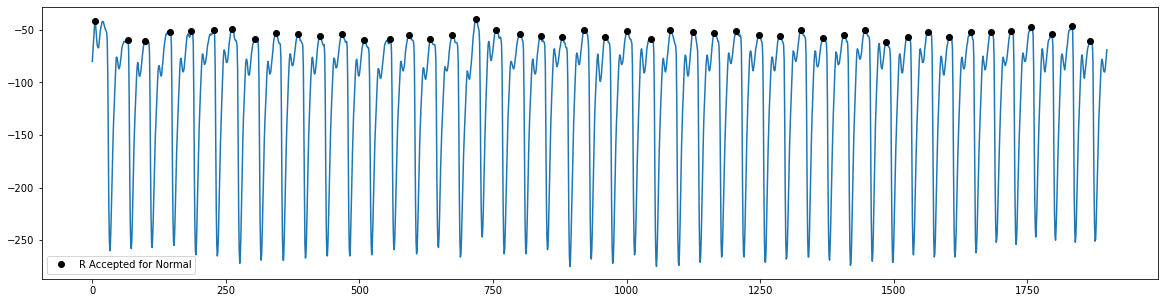

In [ ]:
peaksnidx_n = df_n['PLETH'][peaks_n]
peakslabel_n = mlines.Line2D([], [], color='black', linestyle=' ', marker='o', label='R Accepted for Normal')
plt.figure(figsize=(20, 5))
plt.legend(handles=[peakslabel_n])
plt.plot(df_n['PLETH'])
plt.plot(peaksnidx_n, 'o', color='black')

In [ ]:
data_n = []
for i in range(0,19):
  row_n=[]
  for j in range(0,100):
    data = df_n['PLETH'][(i*100)+j]
    row_n.append(data)
  data_n.append(row_n)

print(data_n)

[[-80, -72, -64, -55, -47, -42, -44, -51, -57, -64, -66, -67, -67, -61, -56, -51, -48, -46, -43, -42, -42, -43, -45, -47, -49, -50, -51, -53, -61, -93, -164, -222, -251, -260, -252, -235, -213, -189, -169, -151, -135, -123, -110, -97, -84, -76, -76, -78, -82, -86, -87, -86, -83, -79, -75, -69, -66, -64, -63, -61, -61, -61, -62, -62, -62, -61, -60, -60, -69, -113, -181, -231, -255, -258, -250, -231, -206, -183, -161, -144, -130, -117, -104, -93, -85, -81, -84, -90, -94, -94, -92, -89, -83, -78, -73, -69, -65, -62, -62, -61], [-62, -64, -63, -63, -62, -62, -62, -71, -111, -180, -229, -252, -257, -247, -231, -210, -187, -167, -151, -138, -125, -113, -101, -90, -85, -84, -86, -90, -93, -94, -92, -85, -81, -74, -68, -64, -60, -57, -54, -54, -53, -52, -53, -54, -53, -52, -52, -53, -64, -110, -181, -229, -251, -255, -245, -228, -205, -185, -164, -149, -135, -122, -110, -97, -85, -78, -77, -80, -85, -89, -90, -89, -86, -80, -73, -67, -61, -57, -55, -54, -55, -56, -57, -56, -53, -51, -51, -52, 

In [ ]:
data_sample_n = []
baseline_n = []
ppg_out_n = []
for i in range(0,19):
    sinyal = soft.waveletSmooth(data_n[i])
    (baseline, ppg_out) = bwr.bwr(sinyal)
    len_sample = len(data_n[i])

    sampled_window = len_sample
    sample = []
    for j in range(sampled_window):
        sample.append(ppg_out[j - 1])
    data_sample_n.append(sample)
    baseline_n.append(baseline)
    ppg_out_n.append(ppg_out)

print(data_sample_n)

[[-34.15703656453678, -55.37132638351564, -48.56290746685026, -37.620614219696606, -27.427158516896764, -18.19443946310131, -11.990958596379429, -11.486244560098683, -12.093264060928426, -15.382709935276473, -18.029103149371828, -18.338519847658915, -17.89811244419947, -15.274257950584925, -10.490172908074825, -1.704569337374508, 3.371619904545696, 4.792558478682039, 11.70181873329743, 18.575794050125445, 24.28497814831642, 29.02351245170272, 31.150029567487117, 31.66950828357095, 32.16932207180917, 32.672459804026, 36.59733092070122, 40.76082093104618, 41.50438997620371, 38.456754541988936, 10.324771232999893, -51.669856802717746, -94.12653794984067, -107.97851247087178, -120.24685461929903, -111.97338142381938, -97.38544392176078, -77.6065095728473, -55.496160478671015, -36.073345809962746, -16.86429432933585, -1.2854136903894755, 12.188161189989714, 22.937052718172367, 34.31138031606358, 46.42282068504099, 52.15864987238464, 52.67468155491939, 50.531275522307624, 44.488209640893956,

In [ ]:
r_peaks_n = []
list_upper_n = []
for h in range(0,len(data_sample_n)):
  m = np.max(data_sample_n[h])
  R = 0.2 * m
  list_upper = []
  r_peaks = []
  for i in range(len(data_sample_n[h])-1):
    if (data_sample_n[h][i] > R):
      list_upper.append(data_sample_n[h][i])
      if (data_sample_n[h][i + 1] < R):
          r_peak = np.max(list_upper)
          r_in = data_sample_n[h].index(r_peak)
          r_peaks.append([r_in, r_peak])
          list_upper = []

  r_peaks_n.append(r_peaks)

print(r_peaks_n)

[[[28, 41.50438997620371], [65, 81.10795935841772]], [[5, 44.370403266309815], [26, 11.554123690721042], [47, 45.29805227120151], [80, 41.33895806098527]], [[22, 39.91343928343088], [48, 9.811674861337366], [62, 23.460771481818732]], [[5, 9.00300988132711], [7, 11.601318866927755], [12, 31.38855383908563], [17, 14.681209185434113], [21, 19.99168631312577], [30, 10.575094629231415], [45, 14.057816825857977], [54, 41.37840723794221], [57, 29.750824736378433], [70, 22.088240466673312], [85, 9.435681707601084], [96, 37.81878216247027]], [[26, 42.81293803115204], [68, 55.746136649838306]], [[10, 47.503295407013724], [50, 18.792639451057887]], [[2, 53.131172186510746], [34, 40.369901105325916], [74, 49.75241742885512]], [[19, 38.86577711446972], [44, 16.89961772834613], [65, 58.527621486295175]], [[3, 48.41984500198936], [25, 16.812576417315015], [41, 37.280217901601695], [66, 46.33024583407261]], [[22, 46.177622041036706], [62, 18.575612771877417]], [[2, 45.550216561520045], [29, 23.9247453

In [ ]:
r_intervals_n = []
for h in range(0,len(r_peaks_n)):
  r_intervals = []
  for i in range(len(r_peaks_n[h]) - 1):
    r1 = r_peaks_n[h][i][0]
    r2 = r_peaks_n[h][i + 1][0]
    rr = r2 - r1
    r_intervals.append(rr)

  r_intervals_n.append(r_intervals)

print(r_intervals_n)

[[37], [21, 21, 33], [26, 14], [2, 5, 5, 4, 9, 15, 9, 3, 13, 15, 11], [42], [40], [32, 40], [25, 21], [22, 16, 25], [40], [27, 16, 39], [15, 27, 12], [28, 20, 33], [40], [27, 21, 18], [13, 39], [24, 16, 37], [39], [19, 12]]


In [ ]:
ca_n = []
for i in range(0,len(ppg_out_n)):
  nlevelmax = dwt.dwt_max_level(len(ppg_out_n[i]), 'sym3')
  coeff = dwt.wavedec(ppg_out_n[i], 'sym3', level=6)
  ca_n.append(coeff[0])

/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [ ]:
hasil_n = []
for i in range(0,len(ca_n)):
  (min, max, mean, med, std) = c.Createdataset(ca_n[i])
  hasil = [min, max, mean, med, std, "N"]
  hasil_n.append(hasil)

In [ ]:
result_n = pd.DataFrame(hasil_n, columns = ['min','max','mean','med','std','label'])
result_n

,min,max,mean,med,std,label
0,-385.820100,-19.226500,-248.872500,-275.096436,137.188424,N
1,-527.302274,397.958724,65.071778,173.893121,345.935598,N
2,-328.838224,-6.310529,-164.638618,-139.285637,120.543788,N
3,-464.459291,-71.153746,-163.852168,-120.133892,149.263102,N
4,-1096.495978,-100.729074,-649.866543,-782.135706,429.686281,N
5,-274.655630,238.663027,59.013393,178.659755,230.107791,N
6,-366.947294,412.843732,108.729818,191.423486,298.352852,N
7,-162.302213,17.700993,-107.125821,-125.355656,64.167284,N
8,-596.085684,455.540927,83.440353,211.807790,394.459017,N
9,-289.465607,-30.007821,-191.724660,-206.735160,93.662134,N


In [ ]:
peakspvc,_ = scipy.signal.find_peaks(df_pvc['PLETH'], distance=400)
peakspvc

array([ 277,  913, 1539, 2183, 2753, 3264, 4049, 4643, 5050, 5555, 5989])

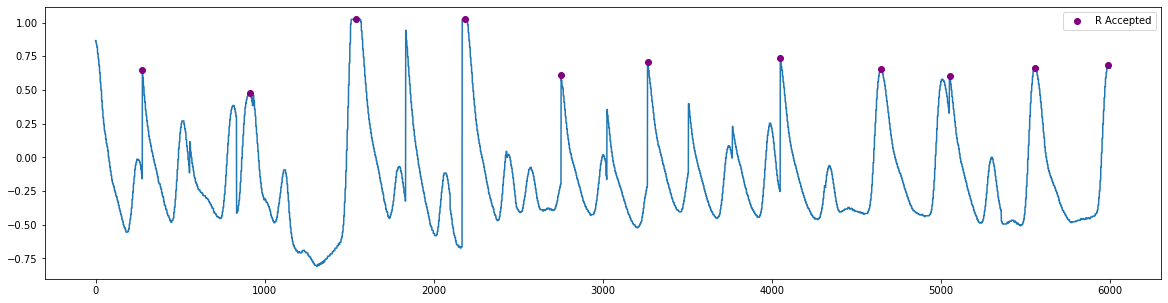

In [ ]:
peakslabel = mlines.Line2D([], [], color='purple', linestyle=' ', marker='o', label='R Accepted')
peaksnidxpvc = df_pvc['PLETH'][peakspvc]
plt.figure(figsize=(20, 5))
plt.legend(handles=[peakslabel])
plt.plot(df_pvc['PLETH'])
plt.plot(peaksnidxpvc, 'o', color='purple')

In [ ]:
datapvc = []
for i in range(0,12):
  rowpvc=[]
  for j in range(0,500):
    data = df_pvc['PLETH'][(i*500)+j]
    rowpvc.append(data)
  datapvc.append(rowpvc)

print(datapvc)

[[0.866, 0.866, 0.866, 0.866, 0.8420000000000001, 0.8420000000000001, 0.8420000000000001, 0.8420000000000001, 0.818, 0.818, 0.818, 0.818, 0.77, 0.77, 0.77, 0.77, 0.731, 0.731, 0.731, 0.731, 0.682, 0.682, 0.682, 0.682, 0.627, 0.627, 0.627, 0.627, 0.555, 0.555, 0.555, 0.555, 0.5, 0.5, 0.5, 0.5, 0.421, 0.421, 0.421, 0.421, 0.35700000000000004, 0.35700000000000004, 0.35700000000000004, 0.35700000000000004, 0.294, 0.294, 0.294, 0.294, 0.246, 0.246, 0.246, 0.246, 0.199, 0.199, 0.199, 0.199, 0.174, 0.174, 0.174, 0.174, 0.135, 0.135, 0.135, 0.135, 0.103, 0.103, 0.103, 0.103, 0.08, 0.08, 0.08, 0.08, 0.048, 0.048, 0.048, 0.048, 0.0, 0.0, 0.0, 0.0, -0.032, -0.032, -0.032, -0.032, -0.071, -0.071, -0.071, -0.071, -0.103, -0.103, -0.103, -0.103, -0.135, -0.135, -0.135, -0.135, -0.16699999999999998, -0.16699999999999998, -0.16699999999999998, -0.16699999999999998, -0.191, -0.191, -0.191, -0.191, -0.206, -0.206, -0.206, -0.206, -0.222, -0.222, -0.222, -0.222, -0.246, -0.246, -0.246, -0.246, -0.262, -0

In [ ]:
data_sample_pvc = []
baseline_pvc = []
ppg_out_pvc = []
for i in range(0,12):
    sinyal = soft.waveletSmooth(datapvc[i])
    (baseline, ppg_out) = bwr.bwr(sinyal)
    len_sample = len(datapvc[i])

    sampled_window = len_sample
    sample = []
    for j in range(sampled_window):
        sample.append(ppg_out[j - 1])
    data_sample_pvc.append(sample)
    baseline_pvc.append(baseline)
    ppg_out_pvc.append(ppg_out)

print(data_sample_pvc)

[[0.11388948451745554, 0.12253206041258147, 0.13650598252556168, 0.11290722575700929, 0.0935785379142684, 0.10423645850816288, 0.07859120045448009, 0.0816795296701659, 0.04128748021705397, -0.033959576522341606, -0.02694046495196134, 0.0022385518421963457, 0.006157286674716933, -0.008872818141889227, -0.012455583587822616, -0.010717505567179764, -0.011318951742063432, -0.009828761364384042, -0.002872013160068687, 0.007972982821512042, 0.010871608095123553, 0.0052447892693063825, 0.0004852528629289976, -0.002426726624888187, -0.00901974162816288, -0.017356471736788226, -0.0070027093206831426, 0.012742330145832259, 0.015283798946572502, 0.0006486085928260055, -0.0006585077794812877, 0.00740830867575526, 0.006257933475627531, 0.00023156213529518244, 0.0013136413875042274, 0.0071847298461909515, -0.00010880602185825428, -0.020011313100675, -0.017330067229588797, 0.001606661185604763, 0.00833450080675091, 0.007154722916094092, 0.003103274992715621, 0.0064283292456041585, 0.00110224735776831

In [ ]:
r_peaks_pvc = []
list_upper_pvc = []
for h in range(0,len(data_sample_pvc)):
  m = np.max(data_sample_pvc[h])
  R = 0.2 * m
  list_upper = []
  r_peaks = []
  for i in range(len(data_sample_pvc[h])-1):
    if (data_sample_pvc[h][i] > R):
      list_upper.append(data_sample_pvc[h][i])
      if (data_sample_pvc[h][i + 1] < R):
          r_peak = np.max(list_upper)
          r_in = data_sample_pvc[h].index(r_peak)
          r_peaks.append([r_in, r_peak])
          list_upper = []

  r_peaks_pvc.append(r_peaks)

print(r_peaks_pvc)

[[[2, 0.13650598252556168], [278, 0.40882493846537943]], [[58, 0.06217092466036117], [61, 0.06742369398112551], [334, 0.23577400181626362]], [[0, 0.6857932707088727], [121, 0.30446989308606875], [139, 0.14970397666003998], [257, 0.15547450657606654]], [[1, 0.14148051289578056], [5, 0.14876798535738556], [329, 0.21914729838929115], [335, 0.5863165374458026]], [[169, 1.0449088476495065], [431, 0.24462814069768674]], [[254, 0.4362479039183732]], [[26, 0.469451223747281], [266, 0.8006945809651348]], [[1, 0.058913310446491146], [7, 0.22126857703183325], [268, 0.1058119744260323]], [[1, 0.2580477331836232], [50, 0.5401869557152668]], [[0, 0.5898675106400243], [4, 0.12306706556496005], [115, 0.1377664674084934], [120, 0.13959493769802128], [158, 0.12311354356093562], [257, 0.18602171248130905]], [[52, 0.670697159324982]], [[0, 0.6576512855324218], [62, 0.4892428164140385]]]


In [ ]:
r_intervals_pvc = []
for h in range(0,len(r_peaks_pvc)):
  r_intervals = []
  for i in range(len(r_peaks_pvc[h]) - 1):
    r1 = r_peaks_pvc[h][i][0]
    r2 = r_peaks_pvc[h][i + 1][0]
    rr = r2 - r1
    r_intervals.append(rr)

  r_intervals_pvc.append(r_intervals)

print(r_intervals_pvc)

[[276], [3, 273], [121, 18, 118], [4, 324, 6], [262], [], [240], [6, 261], [49], [4, 111, 5, 38, 99], [], [62]]


In [ ]:
ca_pvc = []
for i in range(0,len(ppg_out_pvc)):
  nlevelmax = dwt.dwt_max_level(len(ppg_out_pvc[i]), 'sym3')
  coeff = dwt.wavedec(ppg_out_pvc[i], 'sym3', level=6)
  ca_pvc.append(coeff[0])

In [ ]:
hasil_pvc = []
for i in range(0,len(ca_pvc)):
  (min, max, mean, med, std) = c.Createdataset(ca_pvc[i])
  hasil = [min, max, mean, med, std, "PVC"]
  hasil_pvc.append(hasil)

In [ ]:
result_pvc = pd.DataFrame(hasil_pvc, columns = ['min','max','mean','med','std','label'])
result_pvc

,min,max,mean,med,std,label
0,-0.041218,1.036674,0.320498,0.002566,0.436047,PVC
1,-0.319779,0.165279,0.023414,0.000220,0.128037,PVC
2,-1.333364,4.775225,0.115553,-0.504746,1.621944,PVC
3,-0.670492,0.829596,0.184905,0.000263,0.437074,PVC
4,-2.621468,0.898551,-0.439365,-0.541899,0.921930,PVC
5,-0.467066,0.004031,-0.135120,-0.000544,0.197975,PVC
6,-3.887254,2.554026,-0.049424,0.816214,1.823882,PVC
7,-0.080518,0.217393,-0.007857,-0.000778,0.079050,PVC
8,-1.353140,2.069424,0.477226,0.051203,1.029219,PVC
9,-1.308308,4.916728,0.568893,0.490003,1.559278,PVC


In [ ]:
dfready = pd.concat([result_af, result_n, result_pvc]).reset_index(drop=True)
dfready.to_csv('dataready.csv')


In [ ]:
result_pvc['label'].value_counts()

PVC    12
Name: label, dtype: int64

**Training Model**

In [ ]:
df = pd.read_csv('dataready.csv')
df.head(1)

,Unnamed: 0,min,max,mean,med,std,label
0,0,-452.777558,-135.314048,-325.448726,-349.759371,120.399877,AF


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(1)

,min,max,mean,med,std,label
0,-452.777558,-135.314048,-325.448726,-349.759371,120.399877,AF


In [ ]:
x = df[['min','max','mean','med','std']]
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=109)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 3,  2,  0],
       [ 1, 10,  0],
       [ 0,  0,  5]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

          AF       0.75      0.60      0.67         5
           N       0.83      0.91      0.87        11
         PVC       1.00      1.00      1.00         5

    accuracy                           0.86        21
   macro avg       0.86      0.84      0.85        21
weighted avg       0.85      0.86      0.85        21



In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_test, y_test, cv=10)
score

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([1. , 0.5, 1. , 1. , 1. , 1. , 1. , 0. , 0.5, 1. ])

In [ ]:
df_test1 = pd.read_csv('PVC1.csv')
df_test1.head(1)

,min,max,mean,med,std,label
0,-0.462918,-0.044049,-0.190067,-0.099912,0.170224,PVC


In [ ]:
df_test1['label'].value_counts()

PVC    77
Name: label, dtype: int64

In [ ]:
x = df_test1[['min','max','mean','med','std']]
y = df_test1['label']

In [ ]:
y_pred = model.predict(x)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 1.0


In [ ]:
print(classification_report(y, y_pred,))

              precision    recall  f1-score   support

          AF       0.79      0.42      0.55        62
           N       0.21      0.53      0.30        15
         PVC       0.00      0.00      0.00         0

    accuracy                           0.44        77
   macro avg       0.33      0.32      0.28        77
weighted avg       0.67      0.44      0.50        77



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, x, y, cv=10)
score

array([1.        , 1.        , 1.        , 1.        , 0.875     ,
       0.75      , 1.        , 1.        , 0.71428571, 1.        ])

In [ ]:
df_test2 = pd.read_csv('PVC2.csv')
df_test2.head(1)

,min,max,mean,med,std,label
0,-0.462918,-0.044049,-0.190067,-0.099912,0.170224,PVC


In [ ]:
x = df_test1[['min','max','mean','med','std']]
y = df_test1['label']

In [ ]:
y_predpvc = model.predict(x)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y, y_predpvc))

Accuracy: 0.44155844155844154
